## 0. Import libraries

In [303]:
import pandas as pd
import jiwer
import numpy as np
import matplotlib.pyplot as plt

## 1. Prepare data for evaluation

In [304]:
def get_df(name: str):
    df = pd.read_csv(name)
    df = df[["y_pred", "y_true"]]
    return df

    

In [305]:
base_model_df = get_df("../cleaned_output/base_model_prediction_100k.csv")
base_model_df #base model is model which has been not finetuned yet

,y_pred,y_true
0,Vui tôi tiếp vẫn muốn tham gia Xuân Đại. Ngày ...,Viết tiếp về vụ anh Trương Xuân Đại. Ngay từ k...
1,"making no doubt lei is that that's what's in, ...","những người nói lên sự thật "" phát hành, nhiều..."
2,ng họ anh Trường Xuân Đại. Mặt bàn đác 6 tầng ...,ủng hộ anh Trương Xuân Đại. Một bạn đọc 67 tuổ...
3,"yīcuān Dùn 150.000 zhāng, mǎi cǎo gēn tiān Nàn...","Xuân Đại 150.000 đồng, một cô gái tên Nhung ở ..."
4,mẹ thành mẹ nữ Hai đến quý 200.000. Sand và mẹ...,một thanh niên tên Hà đến gửi 200.000 đ. Sau đ...
...,...,...
3108,\[ \angle hcd \],cho
3109,shining,chương
3110,\[\overline{lim}B\],trình
3111,2,3


In [306]:
finetuned_model_100k_df = get_df("../cleaned_output/final_model_prediction_100k.csv")
finetuned_model_100k_df #100k means the model trained with 100k data samples

,y_pred,y_true
0,Việt tiếp về vụ anh trưởng Xuân Đại. Ngày-tử k...,Viết tiếp về vụ anh Trương Xuân Đại. Ngay từ k...
1,"những người mới lên sự thật ""phát hành, nhân l...","những người nói lên sự thật "" phát hành, nhiều..."
2,ứng hộ anh Trương Xuân Đại. Mặt bàn đác 6 tầng...,ủng hộ anh Trương Xuân Đại. Một bạn đọc 67 tuổ...
3,"Xuân Đủ 150.000 đồng, mà có gì trên Nhưng ở Tâ...","Xuân Đại 150.000 đồng, một cô gái tên Nhung ở ..."
4,một thành niên trên Hai Điện quận 200.000. Sin...,một thanh niên tên Hà đến gửi 200.000 đ. Sau đ...
...,...,...
3108,cần,cho
3109,chúng,chương
3110,thứ,trình
3111,3,3


In [307]:
finetuned_model_80k_df = get_df("../cleaned_output/final_model_prediction_80k.csv")
finetuned_model_80k_df

,y_pred,y_true
0,Viết tiếp về mùa anh Trương Xuân Đại. Ngày tư ...,Viết tiếp về vụ anh Trương Xuân Đại. Ngay từ k...
1,"những người mới lên sự thật ""phát hành, nhân l...","những người nói lên sự thật "" phát hành, nhiều..."
2,ng họ anh Trường Xuân Đại. Mặt bàn đác 6 tầng ...,ủng hộ anh Trương Xuân Đại. Một bạn đọc 67 tuổ...
3,"xuân Đủ 150.000 đồng, mà có gì trên Nhưng ở Tâ...","Xuân Đại 150.000 đồng, một cô gái tên Nhung ở ..."
4,một thành niên tại Hai Điện quận 200.000. Sánd...,một thanh niên tên Hà đến gửi 200.000 đ. Sau đ...
...,...,...
3108,cho,cho
3109,chứng,chương
3110,thứ,trình
3111,3,3


## 2. Evaluate models

In [308]:

def evaluate_ocr(df):
    y_true = df["y_true"].astype(str).tolist()
    y_pred = df["y_pred"].astype(str).tolist()

    # CER
    cer = jiwer.cer(y_true, y_pred)

    # WER
    wer = jiwer.wer(y_true, y_pred)

    # Exact match
    em = sum(p == t for p, t in zip(y_pred, y_true)) / len(y_true)

    return cer, wer, em

def cer_single(truth, pred):
    try:
        return jiwer.cer(truth, pred)
    except:
        return np.nan

def wer_single(truth, pred):
    try:
        return jiwer.wer(truth, pred)
    except:
        return np.nan

def exact_match(true, pred):
    return true == pred

### 2.1 Global CER/WER

In [309]:
print("Base Model Report:")
print("-"*20)
cer, wer, em = evaluate_ocr(base_model_df)
print(f"CER: {cer:.4f}")
print(f"WER: {wer:.4f}")
print(f"Exact Match: {em:.4f}")

Base Model Report:
--------------------
CER: 1.5697
WER: 1.6488
Exact Match: 0.0074


In [310]:
print("Model finetuned with 80k samples report:")
print("-"*20)
cer, wer, em = evaluate_ocr(finetuned_model_80k_df)
print(f"CER: {cer:.4f}")
print(f"WER: {wer:.4f}")
print(f"Exact Match: {em:.4f}")

Model finetuned with 80k samples report:
--------------------
CER: 0.5190
WER: 0.7488
Exact Match: 0.2547


In [311]:
print("Model finetuned with 100k samples report:")
print("-"*20)
cer, wer, em = evaluate_ocr(finetuned_model_100k_df)
print(f"CER: {cer:.4f}")
print(f"WER: {wer:.4f}")
print(f"Exact Match: {em:.4f}")

Model finetuned with 100k samples report:
--------------------
CER: 1.1570
WER: 1.4708
Exact Match: 0.2560


### 2.2 Mean CER/WER

In [312]:
def add_metrics(df):
    df["CER"] = df.apply(lambda row: cer_single(row["y_true"], row["y_pred"]), axis=1)
    df["WER"] = df.apply(lambda row: wer_single(row["y_true"], row["y_pred"]), axis=1)
    df["EM"] = df.apply(lambda row: exact_match(row["y_true"], row["y_pred"]), axis=1)
    return df

In [313]:
finetuned_model_100k_df = add_metrics(finetuned_model_100k_df)
finetuned_model_100k_df

,y_pred,y_true,CER,WER,EM
0,Việt tiếp về vụ anh trưởng Xuân Đại. Ngày-tử k...,Viết tiếp về vụ anh Trương Xuân Đại. Ngay từ k...,0.276316,0.684211,False
1,"những người mới lên sự thật ""phát hành, nhân l...","những người nói lên sự thật "" phát hành, nhiều...",0.184211,0.500000,False
2,ứng hộ anh Trương Xuân Đại. Mặt bàn đác 6 tầng...,ủng hộ anh Trương Xuân Đại. Một bạn đọc 67 tuổ...,0.282051,0.611111,False
3,"Xuân Đủ 150.000 đồng, mà có gì trên Nhưng ở Tâ...","Xuân Đại 150.000 đồng, một cô gái tên Nhung ở ...",0.162162,0.562500,False
4,một thành niên trên Hai Điện quận 200.000. Sin...,một thanh niên tên Hà đến gửi 200.000 đ. Sau đ...,0.413793,0.785714,False
...,...,...,...,...,...
3108,cần,cho,0.666667,1.000000,False
3109,chúng,chương,0.333333,1.000000,False
3110,thứ,trình,0.800000,1.000000,False
3111,3,3,0.000000,0.000000,True


In [314]:
finetuned_model_80k_df = add_metrics(finetuned_model_80k_df)
finetuned_model_80k_df

,y_pred,y_true,CER,WER,EM
0,Viết tiếp về mùa anh Trương Xuân Đại. Ngày tư ...,Viết tiếp về vụ anh Trương Xuân Đại. Ngay từ k...,0.250000,0.526316,False
1,"những người mới lên sự thật ""phát hành, nhân l...","những người nói lên sự thật "" phát hành, nhiều...",0.197368,0.444444,False
2,ng họ anh Trường Xuân Đại. Mặt bàn đác 6 tầng ...,ủng hộ anh Trương Xuân Đại. Một bạn đọc 67 tuổ...,0.333333,0.833333,False
3,"xuân Đủ 150.000 đồng, mà có gì trên Nhưng ở Tâ...","Xuân Đại 150.000 đồng, một cô gái tên Nhung ở ...",0.175676,0.625000,False
4,một thành niên tại Hai Điện quận 200.000. Sánd...,một thanh niên tên Hà đến gửi 200.000 đ. Sau đ...,0.431034,0.785714,False
...,...,...,...,...,...
3108,cho,cho,0.000000,0.000000,True
3109,chứng,chương,0.333333,1.000000,False
3110,thứ,trình,0.800000,1.000000,False
3111,3,3,0.000000,0.000000,True


In [315]:
base_model_df = add_metrics(base_model_df)
base_model_df

,y_pred,y_true,CER,WER,EM
0,Vui tôi tiếp vẫn muốn tham gia Xuân Đại. Ngày ...,Viết tiếp về vụ anh Trương Xuân Đại. Ngay từ k...,0.500000,0.894737,False
1,"making no doubt lei is that that's what's in, ...","những người nói lên sự thật "" phát hành, nhiều...",0.723684,1.055556,False
2,ng họ anh Trường Xuân Đại. Mặt bàn đác 6 tầng ...,ủng hộ anh Trương Xuân Đại. Một bạn đọc 67 tuổ...,0.230769,0.666667,False
3,"yīcuān Dùn 150.000 zhāng, mǎi cǎo gēn tiān Nàn...","Xuân Đại 150.000 đồng, một cô gái tên Nhung ở ...",0.445946,0.937500,False
4,mẹ thành mẹ nữ Hai đến quý 200.000. Sand và mẹ...,một thanh niên tên Hà đến gửi 200.000 đ. Sau đ...,0.465517,0.857143,False
...,...,...,...,...,...
3108,\[ \angle hcd \],cho,5.000000,4.000000,False
3109,shining,chương,0.666667,1.000000,False
3110,\[\overline{lim}B\],trình,3.400000,1.000000,False
3111,2,3,1.000000,1.000000,False


In [316]:
def get_leaderboard(df):
    leaderboard = pd.DataFrame({
    "Metric": ["CER", "WER", "Exact Match"],
    "Score": [
        df["CER"].mean(),
        df["WER"].mean(),
        df["EM"].mean()
    ]
    })
    return leaderboard

base_leaderboard = get_leaderboard(base_model_df)
base_leaderboard



,Metric,Score
0,CER,5.768987
1,WER,2.603280
2,Exact Match,0.007388


In [317]:
leaderboard_80k = get_leaderboard(finetuned_model_80k_df)
leaderboard_80k

,Metric,Score
0,CER,0.476018
1,WER,0.724707
2,Exact Match,0.254738


In [318]:
leaderboard_100k = get_leaderboard(finetuned_model_100k_df)
leaderboard_100k

,Metric,Score
0,CER,0.492812
1,WER,0.742439
2,Exact Match,0.256023


#### Visualization in all test set

In [319]:
def plot_ocr_metrics(df, bins=30):
    """
    Creates a single figure with 2 subplots (CER & WER)
    Each histogram has count labels on bars.
    df must contain columns: 'CER' and 'WER'.
    """

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    def plot_hist(ax, values, title, xlabel):
        counts, edges, patches = ax.hist(values, bins=bins)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel("Count")

        centers = 0.5 * (edges[:-1] + edges[1:])

        for c, x in zip(counts, centers):
            if c > 0:
                ax.text(
                    x, c, str(int(c)),
                    ha="center", va="bottom",
                    fontsize=8
                )

    # CER plot
    plot_hist(axes[0], df["CER"].dropna(), "CER Distribution", "CER")

    # WER plot
    plot_hist(axes[1], df["WER"].dropna(), "WER Distribution", "WER")
    plt.tight_layout()
    plt.show()

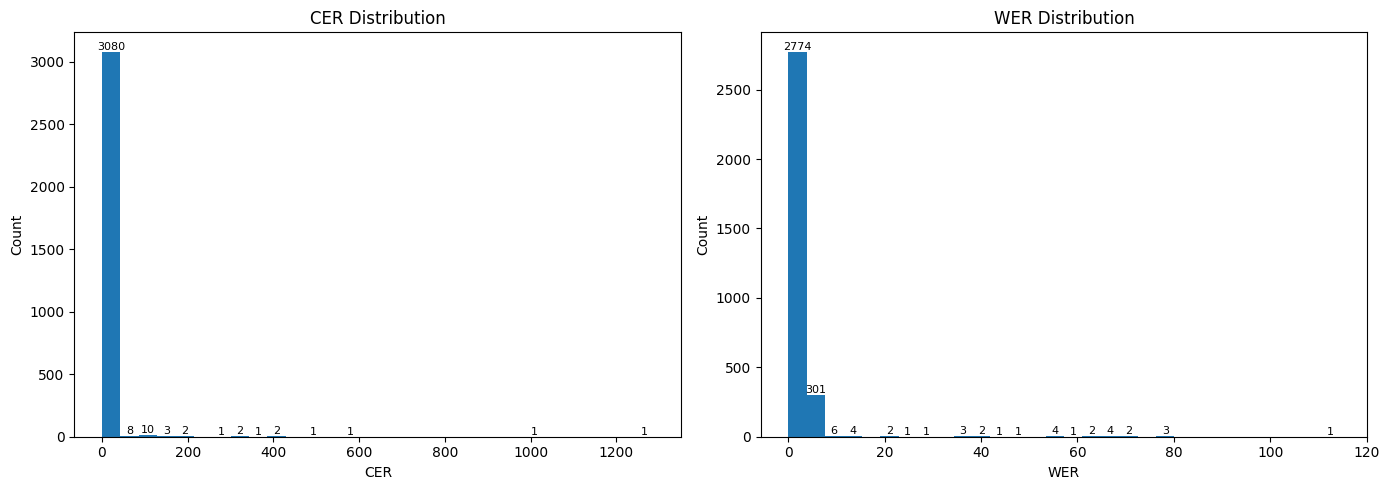

In [320]:
plot_ocr_metrics(base_model_df)

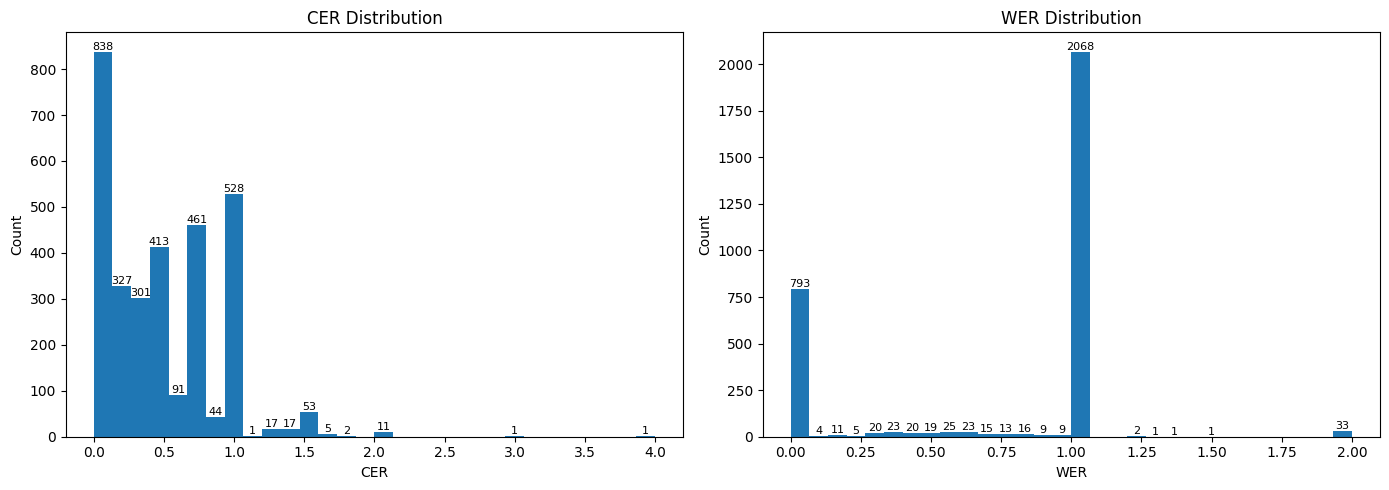

In [321]:
plot_ocr_metrics(finetuned_model_80k_df)

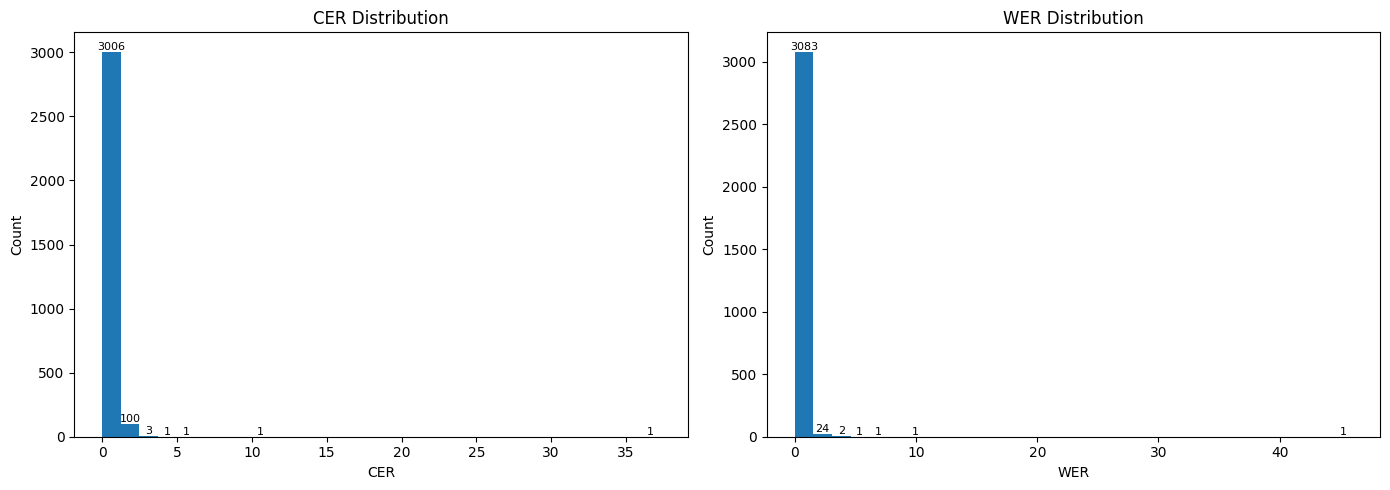

In [322]:
plot_ocr_metrics(finetuned_model_100k_df)

### 2.3 Single word vs Sequence/Paragraph

In [323]:
def split_df(df):
    # Normalize to string
    df["y_true"] = df["y_true"].copy().astype(str)

    # Count words
    df["word_count"] = df["y_true"].apply(lambda x: len(x.strip().split()))

    # Split
    df_single_word = df[df["word_count"] == 1].copy()
    df_sequence = df[df["word_count"] > 1].copy()
    return df_single_word, df_sequence

In [324]:
base_single, base_seq = split_df(base_model_df)
base_single.head()

,y_pred,y_true,CER,WER,EM,word_count
67,书法,đất.,1.000000,1.0,False,1
148,hā,ngờ,1.000000,1.0,False,1
154,mē,mẹ.,0.666667,1.0,False,1
232,\[\sqrt{det}\],Viết,3.250000,1.0,False,1
233,tedn,tiếp,0.750000,1.0,False,1


In [325]:
base_seq.tail()

,y_pred,y_true,CER,WER,EM,word_count
227,Xú lý nghiem minh theo pháp luật và ký luật củ...,Xử lý nghiêm minh theo pháp luật và kỷ luật củ...,0.801435,1.147368,False,95
228,Viê cùi càh hàn shìn: Tàp tưng chàn chìn màn h...,Về cải cách hành chính : Tập trung chấn chỉnh ...,0.339367,0.978723,False,94
229,Xây dựng và phát triển đối ngữ CB-cc có chất l...,Xây dựng và phát triển đội ngũ CB - CC có chất...,0.148515,0.382022,False,89
230,Tiếp tục nhấn rộng các mô hình. Huy động vốn đ...,Tiếp tục nhân rộng các mô hình huy động vốn đầ...,0.168776,0.385321,False,109
231,Nàng cao nóng lúc quán lý nhớ một trên cái hin...,Nâng cao năng lực quản lý nhà nước trên các lĩ...,0.269608,0.704545,False,44


In [326]:
len(base_seq) + len(base_single)

3113

In [327]:
tuned_80k_single, tuned_80k_seq = split_df(finetuned_model_80k_df)
tuned_100k_single, tuned_100k_seq = split_df(finetuned_model_100k_df)

#### 2.3.1 Sequence and paragraph

In [328]:
def all_in_one_report(df):
    cer, wer, em = evaluate_ocr(df)
    print("Global report:")
    print(f"CER: {cer:.4f}")
    print(f"WER: {wer:.4f}")
    print(f"Exact Match: {em:.4f}")

    print("-" * 20)    
    print("Mean report:")
    leaderboard = get_leaderboard(df)
    cer_mean = leaderboard.loc[0, "Score"]
    wer_mean = leaderboard.loc[1, "Score"]
    em_mean = leaderboard.loc[2, "Score"]

    print(f"CER: {cer_mean:.4f}")
    print(f"WER: {wer_mean:.4f}")
    print(f"Exact Match: {em_mean:.4f}")


In [329]:
print("Sequence with base model")
all_in_one_report(base_seq)

Sequence with base model
Global report:
CER: 0.6644
WER: 1.1640
Exact Match: 0.0000
--------------------
Mean report:
CER: 0.4162
WER: 1.2489
Exact Match: 0.0000


In [330]:
print("Sequence with 80k model")
all_in_one_report(tuned_80k_seq)

Sequence with 80k model
Global report:
CER: 0.5330
WER: 0.7522
Exact Match: 0.0087
--------------------
Mean report:
CER: 0.2707
WER: 0.5683
Exact Match: 0.0087


In [331]:
print("Sequence with 100k model")
all_in_one_report(tuned_100k_seq)

Sequence with 100k model
Global report:
CER: 1.4166
WER: 1.8249
Exact Match: 0.0000
--------------------
Mean report:
CER: 0.5318
WER: 0.8612
Exact Match: 0.0000


#### 2.3.2 Single word

In [332]:
print("Single word with base model")
all_in_one_report(base_single)

Single word with base model
Global report:
CER: 5.1561
WER: 2.7108
Exact Match: 0.0080
--------------------
Mean report:
CER: 6.1940
WER: 2.7108
Exact Match: 0.0080


In [333]:
print("Single word with 80k model")
all_in_one_report(tuned_80k_single)

Single word with 80k model
Global report:
CER: 0.4634
WER: 0.7372
Exact Match: 0.2743
--------------------
Mean report:
CER: 0.4923
WER: 0.7371
Exact Match: 0.2743


In [334]:
print("Single word with 100k model")
all_in_one_report(tuned_100k_single)

Single word with 100k model
Global report:
CER: 0.4578
WER: 0.7330
Exact Match: 0.2764
--------------------
Mean report:
CER: 0.4897
WER: 0.7330
Exact Match: 0.2764
